# Titration data analysis

## Titration curve

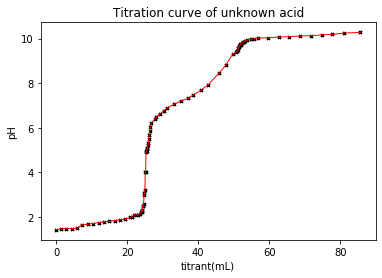

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

titration = pd.read_csv('titrationdata.csv', sep=',')
data = (titration[["Vb","pH"]].dropna(how="any")).values
Vb = data[:,0]
pH = data[:,1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Vb, pH, marker='x', color='black', s = 10)
plt.plot(Vb, pH, 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('pH')
plt.title('Titration curve of unknown acid')
plt.show()

## Derivative method for the $V_{e}$

First derivative calculation

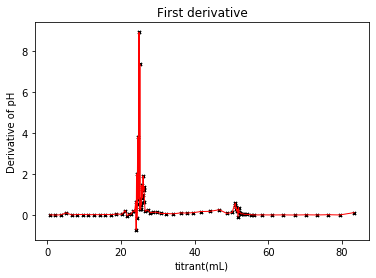

In [3]:
Vb_aug1 = np.append(Vb, np.array([0]))
pH_aug1 = np.append(pH, np.array([0]))
Vb_aug2 = np.append(np.array([0]), Vb)
pH_aug2 = np.append(np.array([0]), pH)
Vb_aug1[0] = 1e-6

dVb = Vb_aug1 - Vb_aug2
dpH = pH_aug1 - pH_aug2
D = dpH / dVb
D_tr = np.array([D[j] for j in range(2,len(D-1))])

V_n = (Vb_aug1 + Vb_aug2) / 2
V_new = np.array([V_n[j] for j in range(1,len(V_n)-1)])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(V_new, D_tr, marker='x', color='black', s = 10)
plt.plot(V_new, D_tr, 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Derivative of pH')
plt.title('First derivative')
plt.show()

Second derivative calculation

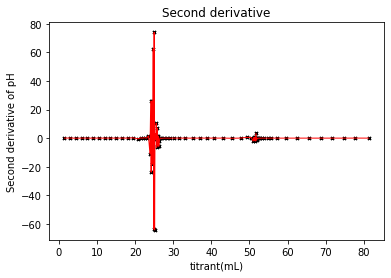

In [4]:
Vb_aug3 = np.append(V_new, np.array([0]))
pH_aug3 = np.append(D_tr, np.array([0]))
Vb_aug4 = np.append(np.array([0]), V_new)
pH_aug4 = np.append(np.array([0]), D_tr)
Vb_aug3[0] = 1e-6

ddVb = Vb_aug3 - Vb_aug4
ddpH = pH_aug3 - pH_aug4
DD = ddpH / ddVb
DD_tr = np.array([DD[j] for j in range(2,len(DD-1))])

V_nn = (Vb_aug3 + Vb_aug4) / 2
V_nnew = np.array([V_nn[j] for j in range(1,len(V_nn)-1)])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(V_nnew, DD_tr, marker='x', color='black', s = 10)
plt.plot(V_nnew, DD_tr, 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Second derivative of pH')
plt.title('Second derivative')
plt.show()

I want to look at two $V_{e}$, approximately near $V\sim 25$ mL and $V\sim 50$ mL.

From the first $V_{e}$, I think that I can set $V_{e,1}=24.98$ mL.

(Oscillation이 너무 심하므로, 근사적으로 양의 방향으로 가장 큰 peak의 형태를 띄는 부분이 평균적으로 이계도함수가 0이 되는 지점과 비슷할 것이라고 가정하고 근사하였음)

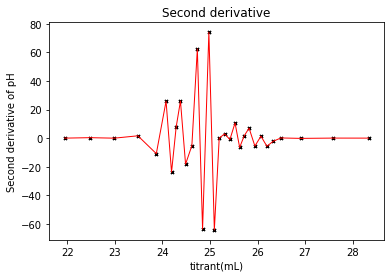

array([[ 24.0775    ,  25.85034014],
       [ 24.1925    , -23.80952381],
       [ 24.29      ,   7.76014109],
       [ 24.38      ,  25.95555556],
       [ 24.4875    , -18.21428571],
       [ 24.62      ,  -5.24691358],
       [ 24.735     ,  62.39316239],
       [ 24.845     , -63.62139918],
       [ 24.9775    ,  74.03508772],
       [ 25.0925    , -64.18732782]])

In [5]:
data_new = np.c_[V_nnew, DD_tr]

m = 15
n = 45

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(V_nnew[m:n], DD_tr[m:n], marker='x', color='black', s = 10)
plt.plot(V_nnew[m:n], DD_tr[m:n], 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Second derivative of pH')
plt.title('Second derivative')
plt.show()

data_new[20:30]

For the second $V_{e}$, $V_{e,2}=51.70$ mL.

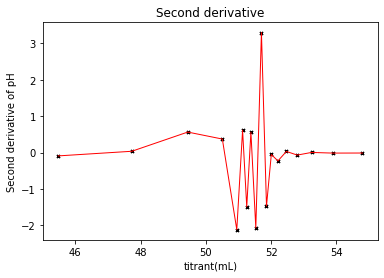

array([[ 5.12525000e+01, -1.49337842e+00],
       [ 5.13800000e+01,  5.60224090e-01],
       [ 5.15300000e+01, -2.07221350e+00],
       [ 5.17025000e+01,  3.29884540e+00],
       [ 5.18575000e+01, -1.46929825e+00],
       [ 5.20050000e+01, -5.44217687e-02],
       [ 5.22075000e+01, -2.30531732e-01],
       [ 5.24675000e+01,  2.96872938e-02],
       [ 5.28000000e+01, -7.06876559e-02],
       [ 5.32375000e+01,  2.24195139e-03],
       [ 5.38850000e+01, -1.57547579e-02],
       [ 5.47950000e+01, -1.39000387e-02]])

In [6]:
m = 54
n = 72

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(V_nnew[m:n], DD_tr[m:n], marker='x', color='black', s = 10)
plt.plot(V_nnew[m:n], DD_tr[m:n], 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Second derivative of pH')
plt.title('Second derivative')
plt.show()

data_new[60:72]

## Drawing Gran Plot

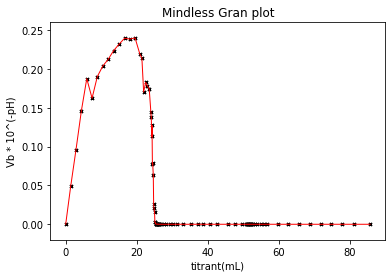

In [7]:
gran_pH = Vb * pow(10, -pH)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Vb, gran_pH, marker='x', color='black', s = 10)
plt.plot(Vb, gran_pH, 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Vb * 10^(-pH)')
plt.title('Mindless Gran plot')
plt.show()

We can observe equivalence point around $V_{e}=25$ mL. Therefore, we restrict the range for $0.8V_{e}=20$ mL to $V_{e}=25$ mL.

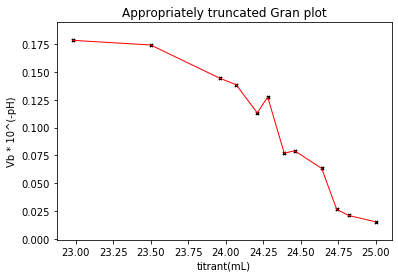

In [8]:
Vb_trunc = np.array([Vb[j] for j in range (18,30)])
gran_pH_trunc = np.array([gran_pH[j] for j in range (18,30)])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Vb_trunc, gran_pH_trunc, marker='x', color='black', s = 10)
plt.plot(Vb_trunc, gran_pH_trunc, 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Vb * 10^(-pH)')
plt.title('Appropriately truncated Gran plot')
plt.show()

pK_a value =  1.28112585117992 

V_e value =  25.284786757773468 



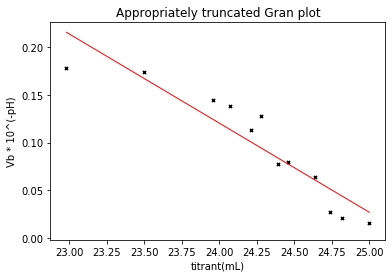

In [9]:
from scipy.optimize import curve_fit as cf

def function(x,a,b):
    return a * x + b

popt, pcov = cf(function, Vb_trunc, gran_pH_trunc)

print('pK_a value = ', - np.log10(-popt[0]/1.79), '\n')
print('V_e value = ', - popt[1] / popt[0], '\n')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Vb_trunc, gran_pH_trunc, marker='x', color='black', s = 10)
plt.plot(Vb_trunc, function(Vb_trunc,*popt), 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Vb * 10^(-pH)')
plt.title('Appropriately truncated Gran plot')
plt.show()

pK_a value =  7.182143611337248 

V_e value =  50.96236348148038 



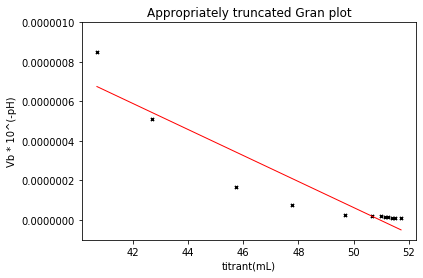

In [10]:
Vb_trunc2 = np.array([Vb[j] for j in range (53,65)])
gran_pH_trunc2 = np.array([gran_pH[j] for j in range (53,65)])

popt2, pcov2 = cf(function, Vb_trunc2, gran_pH_trunc2)

print('pK_a value = ', - np.log10(-popt2[0]), '\n')
print('V_e value = ', - popt2[1] / popt2[0], '\n')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Vb_trunc2, gran_pH_trunc2, marker='x', color='black', s = 10)
plt.plot(Vb_trunc2, function(Vb_trunc2,*popt2), 'r-', linewidth = 1)
plt.xlabel('titrant(mL)')
plt.ylabel('Vb * 10^(-pH)')
plt.ylim(-1e-7,1e-6)
plt.title('Appropriately truncated Gran plot')
plt.show()

## $R^{2}$ value

In [11]:
tot = sum((gran_pH_trunc - np.mean(gran_pH_trunc)) ** 2)
residue = sum((popt[0] * Vb_trunc + popt[1] - gran_pH_trunc) ** 2)
r_sq = 1 - (residue / tot)
print(r_sq)

0.8638553855214447


In [12]:
tot2 = sum((gran_pH_trunc2 - np.mean(gran_pH_trunc2)) ** 2)
residue2 = sum((popt2[0] * Vb_trunc2 + popt2[1] - gran_pH_trunc2) ** 2)
r_sq2 = 1 - (residue2 / tot2)
print(r_sq2)

0.8767111606765476


## Direct Curve Fitting

In [13]:
def f1(Vb,a1,Ve):
    return a1 + np.log10(Vb/(Ve-Vb+1e-8))

def f2(Vb,a2,Ve):
    return a2 + np.log10((Vb-Ve+1e-8)/(2*Ve-Vb+1e-8))

def f3(Vb,Ve):
    return 14 + np.log10(98.52e-3*(Vb-2*Ve+1e-8)/Vb)

Vb1 = np.array([Vb[j] for j in range(2,30)])
Vb2 = np.array([Vb[j] for j in range(30,55)])
Vb3 = np.array([Vb[j] for j in range(60,84)])
pH1 = np.array([pH[j] for j in range(2,30)])
pH2 = np.array([pH[j] for j in range(30,55)])
pH3 = np.array([pH[j] for j in range(60,84)])

popt_f1, pcov_f1 = cf(f1, Vb1, pH1, p0 = [2.1, 25])
popt_f2, pcov_f2 = cf(f2, Vb2, pH2, p0 = [7, 25])
popt_f3, pcov_f3 = cf(f3, Vb3, pH3, p0 = 25)

print('pKa1 = ', popt_f1[0], '\n')
print('pKa2 = ', popt_f2[0], '\n')
print('Ve(first equivalence point) = ', popt_f1[1], '\n')
print('Ve(second equivalence point) = ', popt_f2[1], '\n')
print('Ve(third equivalence point) = ', popt_f3[0], '\n')

pKa1 =  2.0240238192381605 

pKa2 =  7.115876713671502 

Ve(first equivalence point) =  33.30865338030406 

Ve(second equivalence point) =  25.076076796365005 

Ve(third equivalence point) =  25.560385306540294 



/Users/kadry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/Users/kadry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


/Users/kadry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


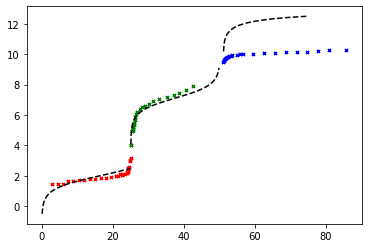

In [14]:
Vb1r = np.arange(0.1,25,0.1)
Vb2r = np.arange(25.1,50,0.1)
Vb3r = np.arange(50.1,75,0.1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Vb1, pH1, marker='x', color='red', s = 10)
plt.plot(Vb1r, f1(Vb1r,*popt_f1), 'k--')
ax.scatter(Vb2, pH2, marker='x', color='green', s = 10)
plt.plot(Vb2r, f2(Vb2r,*popt_f2), 'k--')
ax.scatter(Vb3, pH3, marker='x', color='blue', s = 10) 
plt.plot(Vb3r, f3(Vb3r,*popt_f3), 'k--')
#plt.plot(Vb,pH,'r-', linewidth=0.8)
plt.show()

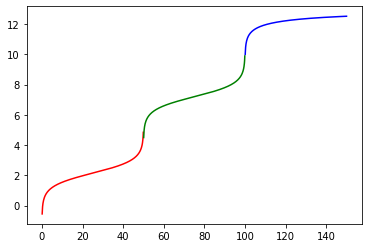

In [16]:
def f1(Vb,a1,Ve):
    return a1 + np.log10(Vb/(Ve-Vb+1e-8))

def f2(Vb,a2,Ve):
    return a2 + np.log10((Vb-Ve+1e-8)/(2*Ve-Vb+1e-8))

def f3(Vb,Ve):
    return 14 + np.log10(0.1*(Vb-2*Ve+1e-8)/Vb)

popt_f1[0] = 2.15
popt_f2[0] = 7.20
popt_f1[1] = 50.0
popt_f2[1] = 50.0
popt_f3[0] = 50.0

Vb1 = np.arange(0.1,50,0.1)
Vb2 = np.arange(50.1,100,0.1)
Vb3 = np.arange(100.1,150.1,0.1)

plt.plot(Vb1, f1(Vb1,popt_f1[0],popt_f1[1]), 'r-')
plt.plot(Vb2, f2(Vb2,popt_f2[0],popt_f2[1]), 'g-')
plt.plot(Vb3, f3(Vb3,popt_f3[0]), 'b-')
plt.show()